# 785 Final Project Spectral Data Visualizations

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import math
from collections import defaultdict
import scipy
import requests
import librosa
import torch
data_dir = "/home/gh/autosubs/data/"

In [11]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or 'Spectrogram (db)')
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

In [12]:
knnw_processed_comma = pd.read_csv(data_dir + "processed_comma.csv")
knnw_processed = pd.read_csv(data_dir + "processed.csv")
knnw_en_sub = pd.read_csv(data_dir + "knnw_en_sub.csv", sep=";")
knnw_spectrogram = np.load(data_dir + "knnw_en.log_spectrogram.npy", allow_pickle=True)
knnw_wav2vec = np.load(data_dir + "wav2vec.npy", allow_pickle=True)
wsj_spectro = np.load(data_dir + "wsj/train.npy", allow_pickle=True)
wsj_text = np.load(data_dir + "wsj/train_transcripts.npy", allow_pickle=True)
wsj_transcript_tsne = np.load(data_dir + "wsj_transcript_tsne.npy", allow_pickle=True)
knnw_transcript_tsne = np.load(data_dir + "knnw_transcript_tsne.npy", allow_pickle=True)
wsj_spectral_tsne = np.load(data_dir + "wsj_spectral_tsne.npy", allow_pickle=True)
knnw_spectral_tsne = np.load(data_dir + "knnw_spectral_tsne.npy", allow_pickle=True)
knnw_wav2vec_tsne = np.load(data_dir + "knnw_wav2vec_tsne.npy", allow_pickle=True)

# WSJ Word Frequencies

In [13]:
wsj_counts = defaultdict(int)
total_words = 0

for sentence in wsj_text:
    for word in sentence:
        wsj_counts[word.decode("utf-8")] += 1
        total_words += 1

In [14]:
wsj_word_vocabulary = len(wsj_counts.keys())
print(wsj_word_vocabulary)
wsj_top_100 = sorted(wsj_counts.items(), key=lambda x : -1*x[1])[:100]
print(wsj_top_100)

33798
[('the', 60133), ('and', 33258), ('of', 29876), ('to', 27365), ('a', 21766), ('in', 16508), ('i', 13311), ('was', 13262), ('he', 13064), ('that', 12534), ('it', 11005), ('his', 9679), ('had', 8331), ('as', 8081), ('with', 8008), ('you', 7541), ('for', 7421), ('her', 6984), ('but', 6410), ('is', 6299), ('not', 6269), ('she', 5966), ('at', 5841), ('on', 5649), ('be', 5326), ('him', 4956), ('they', 4719), ('by', 4437), ('have', 4389), ('this', 4329), ('my', 4314), ('were', 4307), ('which', 4258), ('all', 4171), ('from', 4069), ('so', 3885), ('said', 3863), ('one', 3769), ('me', 3699), ('we', 3274), ('there', 3097), ('their', 3061), ('no', 3050), ('when', 2994), ('an', 2902), ('or', 2879), ('them', 2866), ('would', 2815), ('if', 2674), ('who', 2657), ('are', 2583), ('been', 2557), ('what', 2551), ('up', 2304), ('then', 2258), ('out', 2256), ('could', 2147), ('will', 2134), ('into', 2000), ('more', 1986), ('some', 1836), ('very', 1827), ('man', 1813), ('do', 1811), ('now', 1771), ('li

# KNNW Word Frequencies

In [15]:
knnw_counts = defaultdict(int)
knnw_total_words = 0

for sentence in knnw_processed_comma['Text'].values:
    for word in sentence.split(' '):
        knnw_counts[word] += 1
        knnw_total_words += 1

In [16]:
knnw_word_vocabulary = len(knnw_counts.keys())
print(knnw_word_vocabulary)
knnw_top_100 = sorted(knnw_counts.items(), key=lambda x : -1*x[1])[:100]
print(knnw_top_100)

1543
[('the', 258), ('you', 241), ('i', 237), ('a', 189), ('it', 141), ('to', 139), ('that', 119), ('of', 116), ('and', 114), ('what', 96), ('is', 84), ('this', 82), ('its', 81), ('in', 73), ('we', 65), ('for', 64), ('your', 63), ('are', 58), ('be', 57), ('mitsuha', 56), ('just', 55), ('have', 52), ('was', 51), ('me', 51), ('but', 49), ('like', 48), ('on', 48), ('taki', 47), ('so', 47), ('youre', 47), ('all', 44), ('no', 42), ('time', 41), ('do', 41), ('oh', 40), ('dont', 40), ('well', 39), ('with', 39), ('up', 38), ('my', 38), ('here', 38), ('thats', 36), ('im', 36), ('at', 36), ('uh', 36), ('now', 35), ('were', 35), ('who', 35), ('when', 32), ('if', 32), ('one', 32), ('way', 31), ('about', 31), ('why', 30), ('right', 30), ('huh', 29), ('even', 28), ('not', 28), ('go', 28), ('can', 27), ('more', 27), ('did', 27), ('been', 26), ('little', 26), ('today', 25), ('hey', 25), ('town', 24), ('see', 24), ('really', 24), ('out', 23), ('or', 22), ('our', 22), ('where', 22), ('there', 22), ('her

# WSJ Utterance vs KNNW Utterance Sample

## Change start_long and end_long to subsample the dataset

In [17]:
flat_wsj_spectro = []
for utterance in wsj_spectro:
    for frame in utterance:
        flat_wsj_spectro.append(frame)

flat_wsj_spectro = np.array(flat_wsj_spectro)

wsj spectrogram shape (28987214, 40)


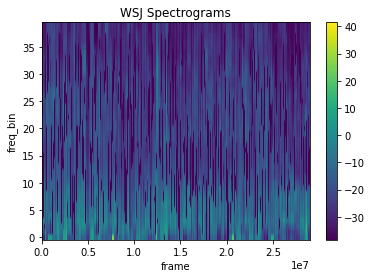

In [18]:
print(f"wsj spectrogram shape {flat_wsj_spectro.shape}")
start_long = 0
end_long = 10000000000
plot_spectrogram(flat_wsj_spectro[start_long:end_long].T, title="WSJ Spectrograms", ylabel='freq_bin', aspect='auto', xmax=None)

knnw spectrogram shape (129, 1370493)


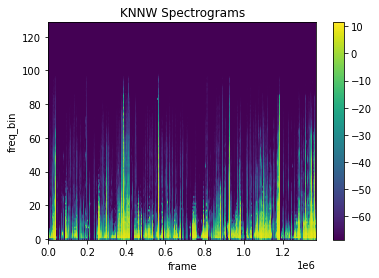

In [19]:
start_long = 0
end_long = 1000000000000
print(f"knnw spectrogram shape {knnw_spectrogram.shape}")
plot_spectrogram(knnw_spectrogram[:, start_long:end_long], title="KNNW Spectrograms", ylabel='freq_bin', aspect='auto', xmax=None)